In [114]:
!pip install tensorflow
!pip install keras_preprocessing

In [115]:
import urllib.request
import zipfile
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
RMSprop = tf.keras.optimizers.RMSprop
Regularizers = tf.keras.Regularizer
EarlyStopping = tf.keras.callbacks.EarlyStopping

In [116]:
# Download training data
data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
with zipfile.ZipFile('horse-or-human.zip', 'r') as zip_ref:
    zip_ref.extractall('data/horse-or-human')

# Download validation data
data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
with zipfile.ZipFile('validation-horse-or-human.zip', 'r') as zip_ref:
    zip_ref.extractall('data/validation-horse-or-human')



In [117]:
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR = 'data/validation-horse-or-human'

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [118]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
    tf.keras.layers.Dropout(0.),

    tf.keras.layers.Dense(1, activation='sigmoid')  # DO NOT CHANGE THIS LINE!
])


In [119]:
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=4,
    factor=0.5,
    verbose=1
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    verbose=2,
    callbacks=[early_stop, lr_schedule,checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.54688, saving model to best_model.h5


33/33 - 40s - 1s/step - accuracy: 0.5735 - loss: 0.7178 - val_accuracy: 0.5469 - val_loss: 0.6321 - learning_rate: 1.0000e-03
Epoch 2/50

Epoch 2: val_accuracy improved from 0.54688 to 0.64844, saving model to best_model.h5


33/33 - 34s - 1s/step - accuracy: 0.7468 - loss: 0.5245 - val_accuracy: 0.6484 - val_loss: 0.7923 - learning_rate: 1.0000e-03
Epoch 3/50

Epoch 3: val_accuracy improved from 0.64844 to 0.66797, saving model to best_model.h5


33/33 - 33s - 1s/step - accuracy: 0.8637 - loss: 0.5567 - val_accuracy: 0.6680 - val_loss: 2.0652 - learning_rate: 1.0000e-03
Epoch 4/50

Epoch 4: val_accuracy improved from 0.66797 to 0.83984, saving model to best_model.h5


33/33 - 42s - 1s/step - accuracy: 0.8880 - loss: 0.2495 - val_accuracy: 0.8398 - val_loss: 1.1401 - learning_rate: 1.0000e-03
Epoch 5/50

Epoch 5: val_accuracy improved from 0.83984 to 0.84766, saving model to best_model.h5


33/33 - 33s - 992ms/step - accuracy: 0.8870 - loss: 0.2769 - val_accuracy: 0.8477 - val_loss: 0.4526 - learning_rate: 1.0000e-03
Epoch 6/50

Epoch 6: val_accuracy did not improve from 0.84766
33/33 - 34s - 1s/step - accuracy: 0.9143 - loss: 0.2261 - val_accuracy: 0.8477 - val_loss: 0.7640 - learning_rate: 1.0000e-03
Epoch 7/50

Epoch 7: val_accuracy did not improve from 0.84766
33/33 - 33s - 992ms/step - accuracy: 0.9270 - loss: 0.2016 - val_accuracy: 0.6133 - val_loss: 3.5984 - learning_rate: 1.0000e-03
Epoch 8/50

Epoch 8: val_accuracy did not improve from 0.84766
33/33 - 38s - 1s/step - accuracy: 0.9484 - loss: 0.1432 - val_accuracy: 0.8281 - val_loss: 0.8634 - learning_rate: 1.0000e-03
Epoch 9/50

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 9: val_accuracy did not improve from 0.84766
33/33 - 34s - 1s/step - accuracy: 0.9542 - loss: 0.1179 - val_accuracy: 0.7266 - val_loss: 2.6655 - learning_rate: 1.0000e-03
Epoch 10/50

Epoch 10: val_accuracy

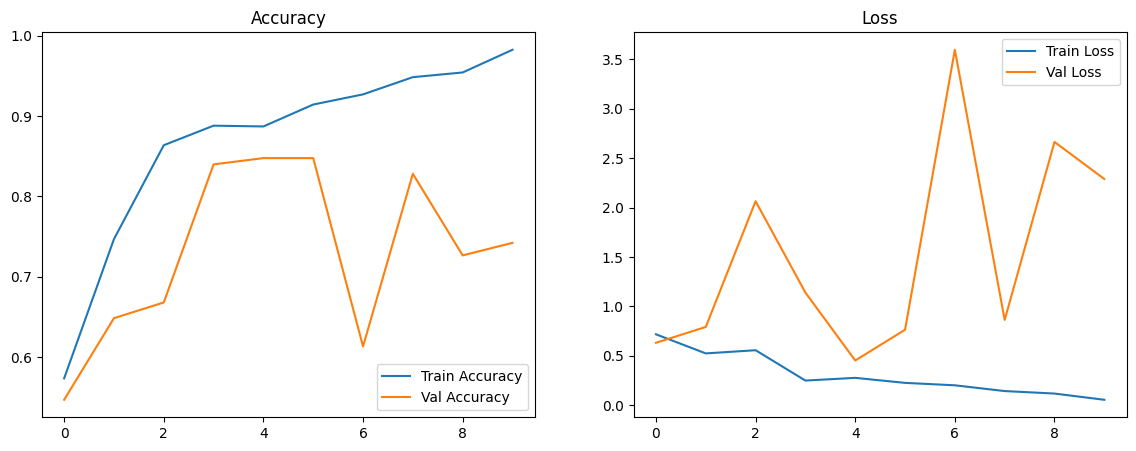

In [123]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


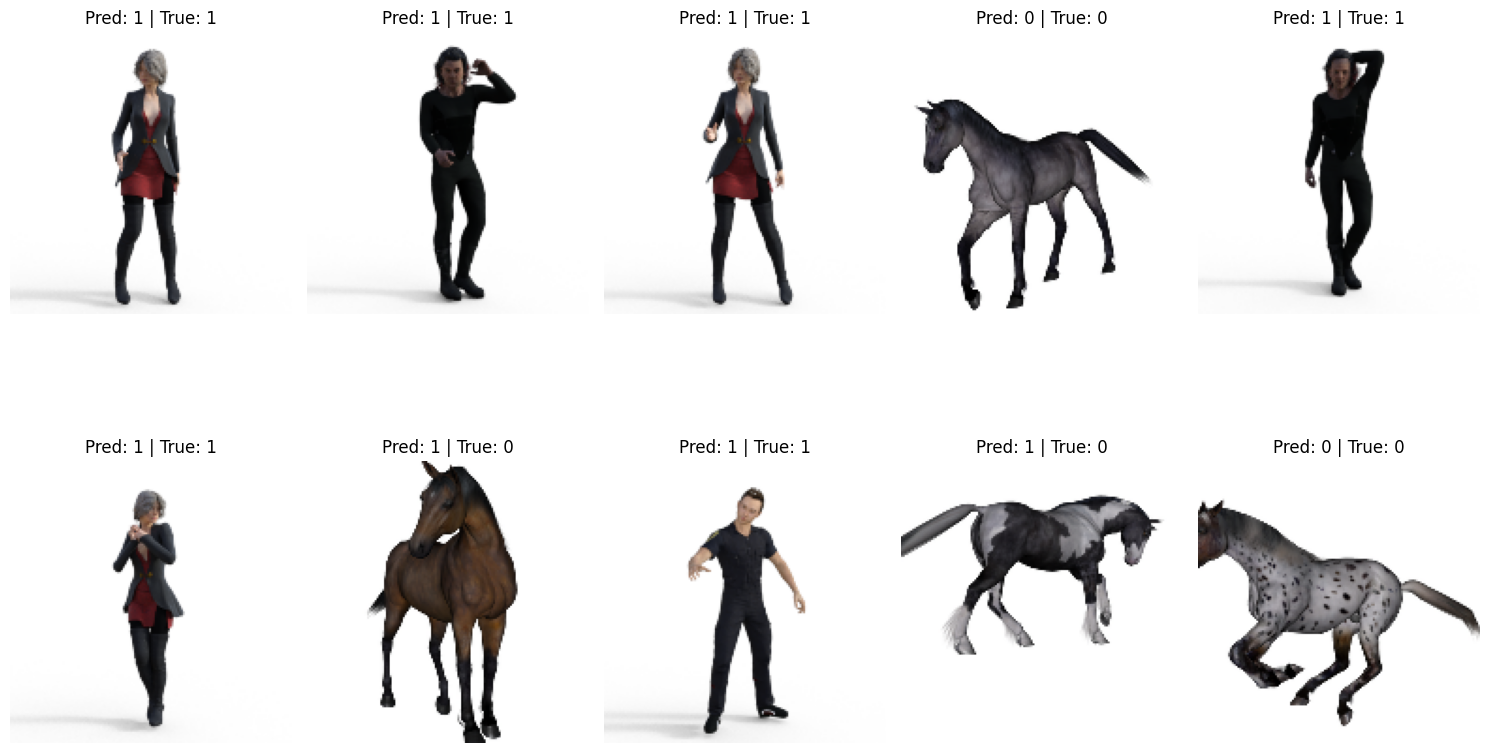

In [127]:
x_batch, y_batch = next(validation_generator)
preds = model.predict(x_batch)
preds = (preds > 0.5).astype("int32")

plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_batch[i])
    plt.title(f"Pred: {preds[i][0]} | True: {int(y_batch[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [126]:
model.save("model_05.h5")
